In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [66]:
df = pd.read_csv('Student_Performance.csv')

In [67]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [68]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [69]:
df.duplicated().sum()

np.int64(127)

In [70]:
df.drop_duplicates(inplace=True)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9873 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     9873 non-null   int64  
 1   Previous Scores                   9873 non-null   int64  
 2   Extracurricular Activities        9873 non-null   object 
 3   Sleep Hours                       9873 non-null   int64  
 4   Sample Question Papers Practiced  9873 non-null   int64  
 5   Performance Index                 9873 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 539.9+ KB


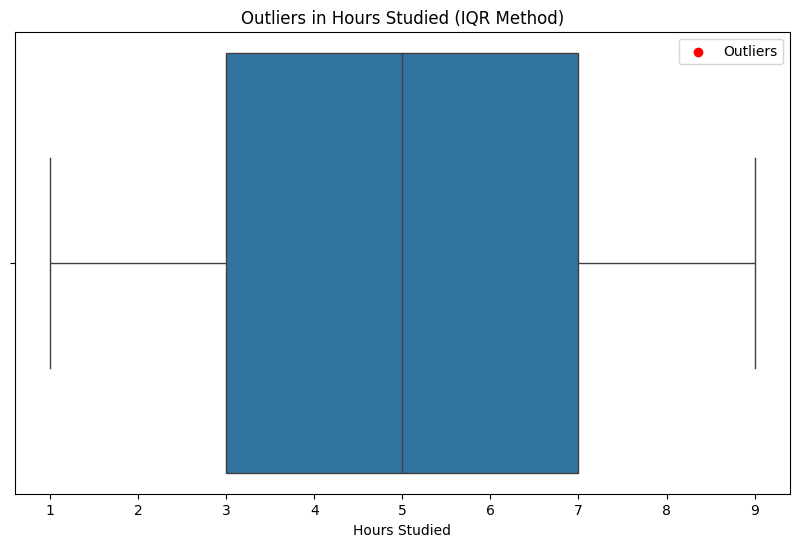

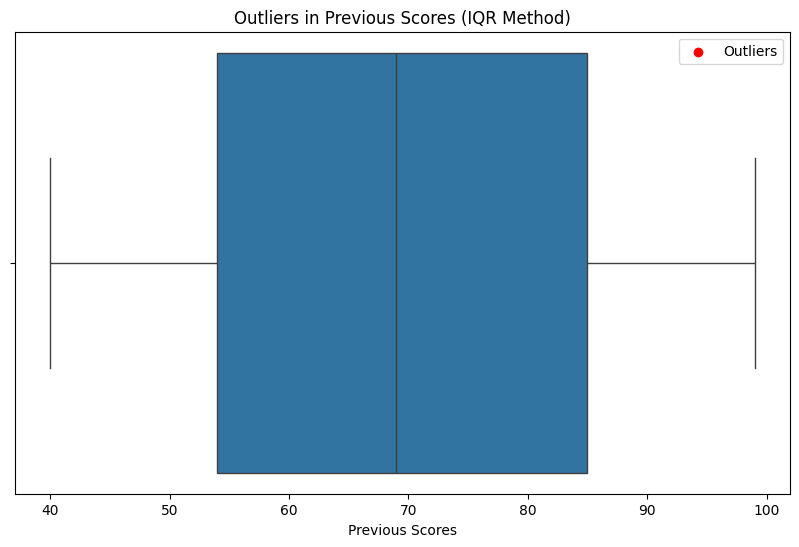

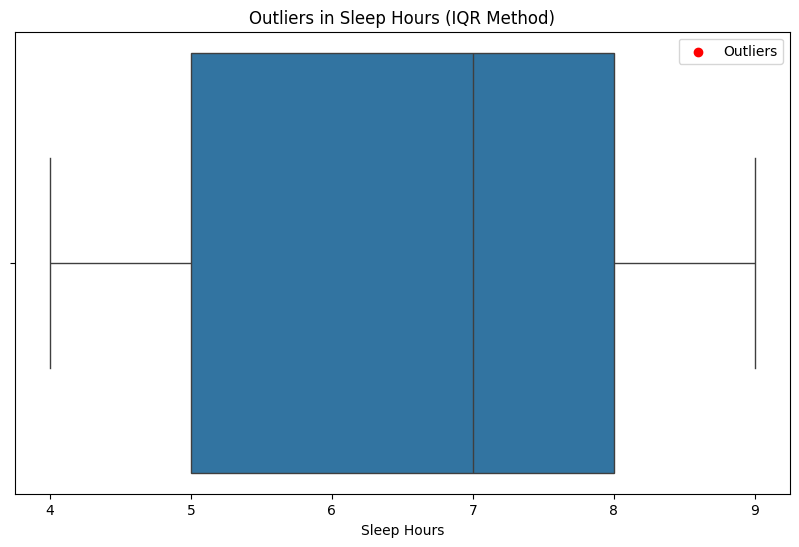

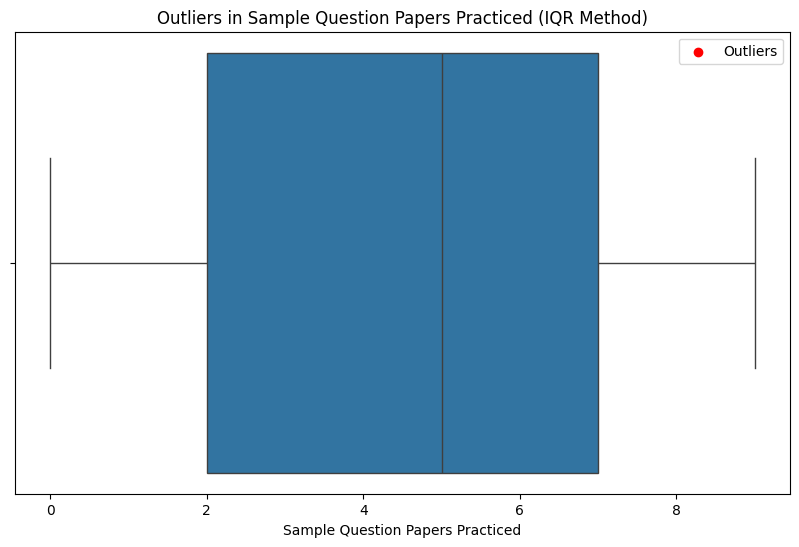

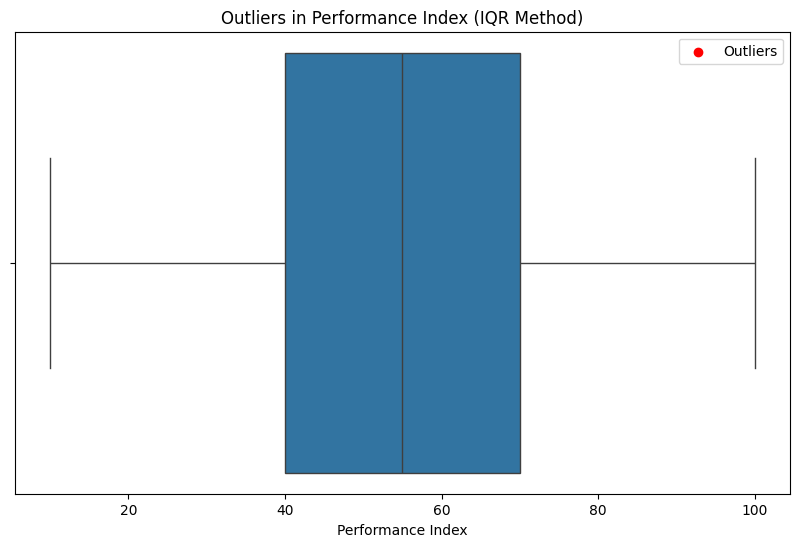

In [72]:
numerical_columns = df.select_dtypes(include=[np.number]).columns

def detect_outliers_iqr(df, column):

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (df[column] < lower_bound) | (df[column] > upper_bound)

for column in numerical_columns:
    outliers = detect_outliers_iqr(df, column)
    
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.scatter(df[column][outliers], [0] * sum(outliers), color="red", label="Outliers")
    plt.title(f"Outliers in {column} (IQR Method)")
    plt.xlabel(column)
    plt.legend()
    plt.show()

In [73]:
df_model = df.copy()

In [74]:
df_model['Extracurricular Activities'] = df_model['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

df_model.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [75]:
numerical_columns = df.select_dtypes(include=['number']).columns

ranges = df[numerical_columns].agg(['min', 'max']).T
ranges['Range'] = ranges['max'] - ranges['min']
print(ranges)

                                   min    max  Range
Hours Studied                      1.0    9.0    8.0
Previous Scores                   40.0   99.0   59.0
Sleep Hours                        4.0    9.0    5.0
Sample Question Papers Practiced   0.0    9.0    9.0
Performance Index                 10.0  100.0   90.0


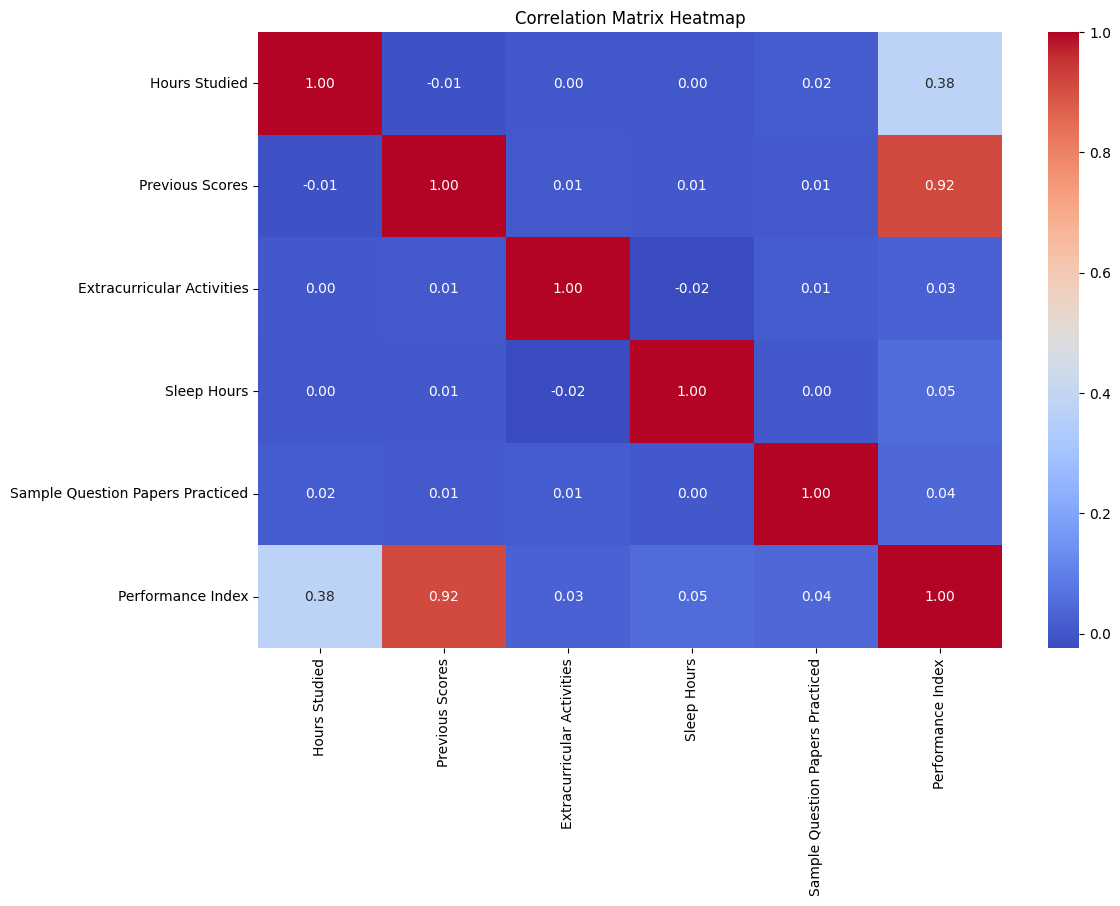

In [76]:
# Compute the correlation matrix for numerical columns
correlation_matrix = df_model.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [77]:
X = df_model[['Previous Scores', 'Hours Studied']].values
Y = df_model[['Performance Index']].values

In [78]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_Y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
Y_scaled = scaler_Y.fit_transform(Y)

In [79]:
import numpy as np
import matplotlib.pyplot as plt

class MultipleLinearRegression:
    def __init__(self):
       
        self.B = None  # Coefficients, including intercept
        self.MSE = None

    def fit(self, X, y):
        # 1. Ensure X and y are numpy arrays
        X = np.array(X)
        y = np.array(y)

        # 2. Add a column of ones to X for the intercept term
        n_samples = X.shape[0]
        X = np.c_[np.ones((n_samples, 1)), X]

        # 3. Calculate the coefficients using the Normal Equation: B = (X^T X)^(-1) X^T y
        self.B = np.linalg.inv(X.T @ X) @ X.T @ y

        # 4. Calculate residuals and Mean Squared Error (MSE)
        y_hat = self.predict(X, add_bias=False)
        e = y - y_hat  # Residuals
        SSE = sum(e**2)
        self.MSE = SSE / (n_samples - X.shape[1])  # Divide by (n - p), where p = number of coefficients

    def predict(self, X, add_bias=True):
        
        # 1. Raise a ValueError if the model has not been fitted yet
        if self.B is None:
            raise ValueError("The model has not been fitted yet.")

        # 2. Ensure X is a numpy array
        X = np.array(X)

        # 3. Add a column of ones to X for the intercept term if needed
        if add_bias:
            X = np.c_[np.ones((X.shape[0], 1)), X]

        # 4. Return the estimated y
        return X @ self.B

    def plot(self, X, y):
        if self.B is None:
            raise ValueError("The model has not been fitted yet.")

        # Ensure X and y are numpy arrays
        X = np.array(X)
        y = np.array(y)

        if X.shape[1] != 2:
            raise ValueError("Plotting is only supported for datasets with exactly 2 features.")

        # Generate grid for the regression plane
        x1_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 50)
        x2_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 50)
        x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

        # Predicted values for the grid
        y_pred_grid = (
            self.B[0] + self.B[1] * x1_grid + self.B[2] * x2_grid
        )  # Plane equation

        # Create 3D scatter plot with regression plane
        fig = plt.figure(figsize=(10, 6))
        ax = fig.add_subplot(111, projection="3d")
        ax.scatter(X[:, 0], X[:, 1], y, color="blue", label="Data points")
        ax.plot_surface(x1_grid, x2_grid, y_pred_grid, color="red", alpha=0.5, label="Regression plane")
        ax.set_xlabel("Feature 1")
        ax.set_ylabel("Feature 2")
        ax.set_zlabel("Target")
        ax.set_title("Multiple Linear Regression with Regression Plane")
        plt.legend()
        plt.show()

In [80]:
model = MultipleLinearRegression()

# Fit the model
model.fit(X_scaled, Y_scaled)

In [81]:
# Predictions
y_pred_scaled = model.predict(X_scaled)

# Inverse transform predictions to original scale
y_pred = scaler_Y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()


In [82]:
# Add predictions to the DataFrame
df_model["Predicted Performance Index"] = y_pred

# Display the first few rows
df_model.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Predicted Performance Index
0,7,99,1,9,1,91.0,91.079074
1,4,82,0,4,2,65.0,65.181227
2,8,51,1,7,2,45.0,45.017212
3,5,52,1,5,2,36.0,37.464096
4,7,75,0,8,5,66.0,66.619432


In [83]:
# Retrieve coefficients
weights = model.B
feature_count = len(weights) - 1

In [84]:
# Construct the regression equation
equation = f"y = {weights[0]} "
for i in range(1, feature_count + 1):
    equation += f"+ {weights[i]} * x{i} "
print(f"The best fit equation: {equation}")
print(f"Mean Squared Error: {model.MSE}")


The best fit equation: y = [-4.82144604e-18] + [0.91924682] * x1 + [0.38514574] * x2 
Mean Squared Error: [0.01421177]


MemoryError: Unable to allocate 1.45 GiB for an array with shape (97476129, 2) and data type float64

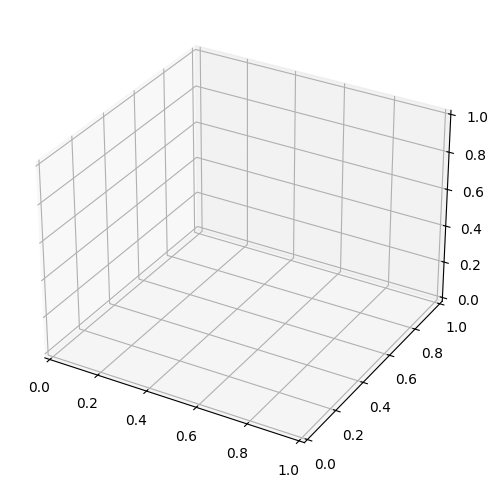

In [85]:
model.plot(X_scaled, Y_scaled)